In [2]:
import pandas as pd

df = pd.read_csv('/content/Salary_Data[1].csv')

# Identify independent and dependent variables
X = df['Age'].values.reshape(-1, 1)
y = df['Salary']

print("Dataset loaded successfully.")
print("Shape of independent variable X:", X.shape)
print("Shape of dependent variable y:", y.shape)
print("\nFirst 5 rows of X:\n", X[:5])
print("\nFirst 5 rows of y:\n", y[:5])

Dataset loaded successfully.
Shape of independent variable X: (6704, 1)
Shape of dependent variable y: (6704,)

First 5 rows of X:
 [[32.]
 [28.]
 [45.]
 [36.]
 [52.]]

First 5 rows of y:
 0     90000.0
1     65000.0
2    150000.0
3     60000.0
4    200000.0
Name: Salary, dtype: float64


In [17]:
display(df.head())

print(df.shape)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


(6699, 6)


In [18]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5359, 1)
Shape of X_test: (1340, 1)
Shape of y_train: (5359,)
Shape of y_test: (1340,)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("Model coefficients: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model coefficients:  [5038.01361961]
Model intercept:  -53978.89401482267


In [20]:
df.dropna(subset=['Age', 'Salary'], inplace=True)

X = df['Age'].values.reshape(-1, 1)  # Independent variable (feature)
y = df['Salary']  # Dependent variable (target)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")
print("Model coefficients: ", model.coef_)
print("Model intercept: ", model.intercept_)

Linear Regression model trained successfully.
Model coefficients:  [5038.01361961]
Model intercept:  -53978.89401482267


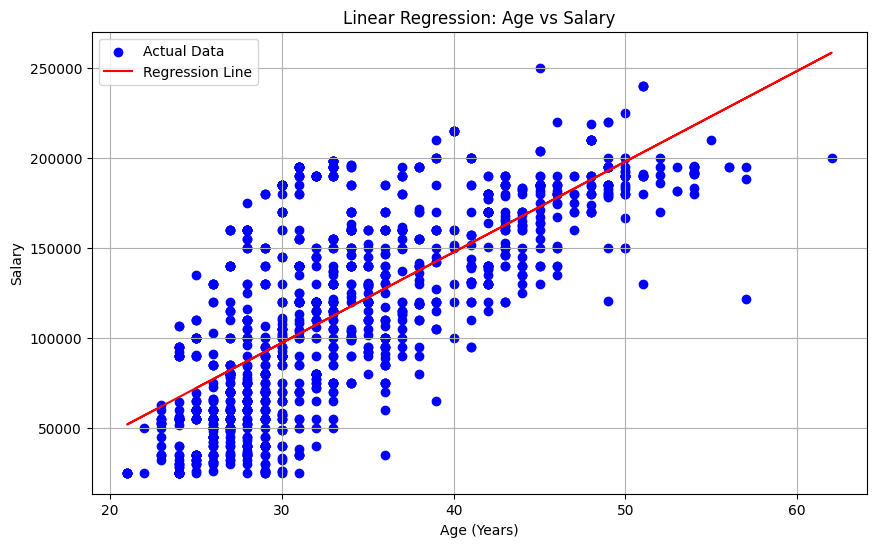

In [21]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Linear Regression: Age vs Salary')
plt.xlabel('Age (Years)')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared: 0.54
Mean Absolute Error (MAE): 28720.92
Mean Squared Error (MSE): 1304133406.91


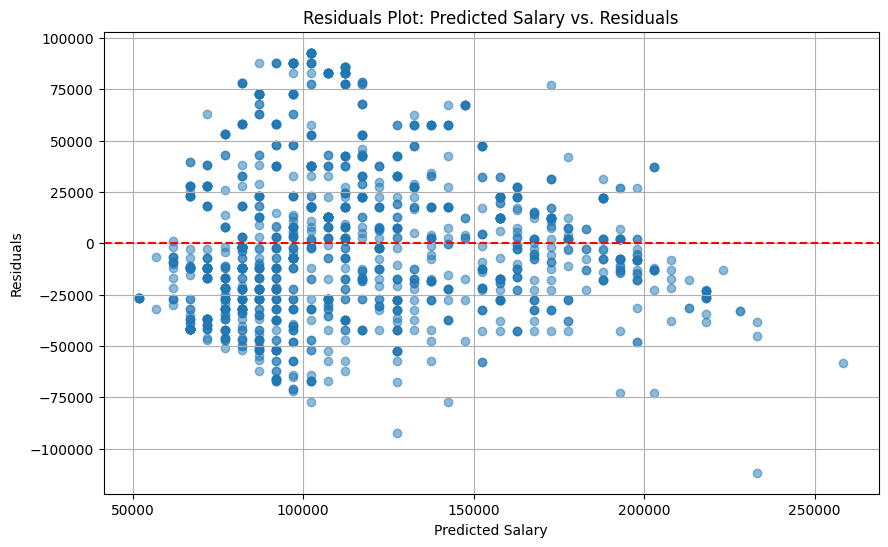

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)

plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals Plot: Predicted Salary vs. Residuals')

plt.grid(True)
plt.show()

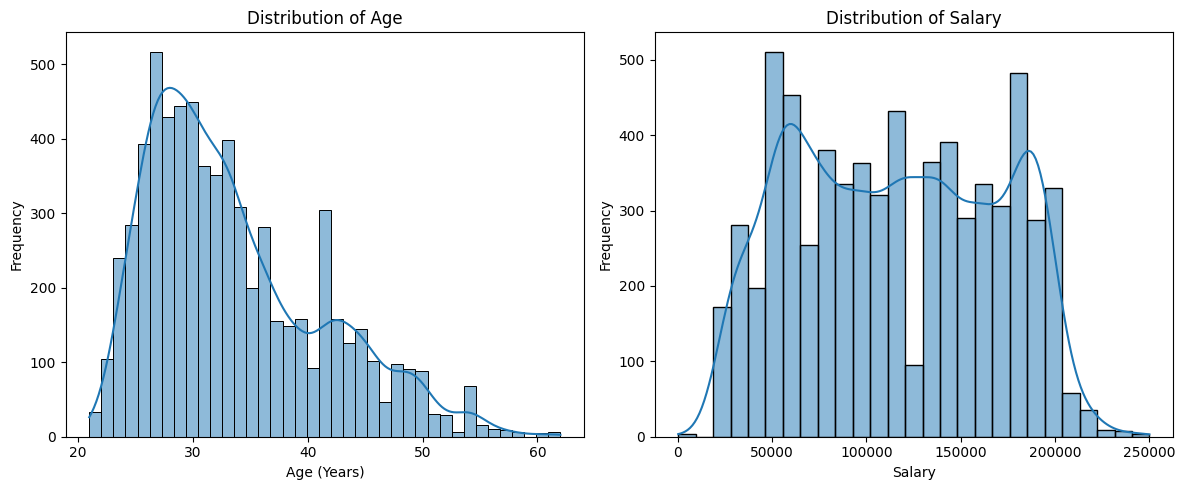

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

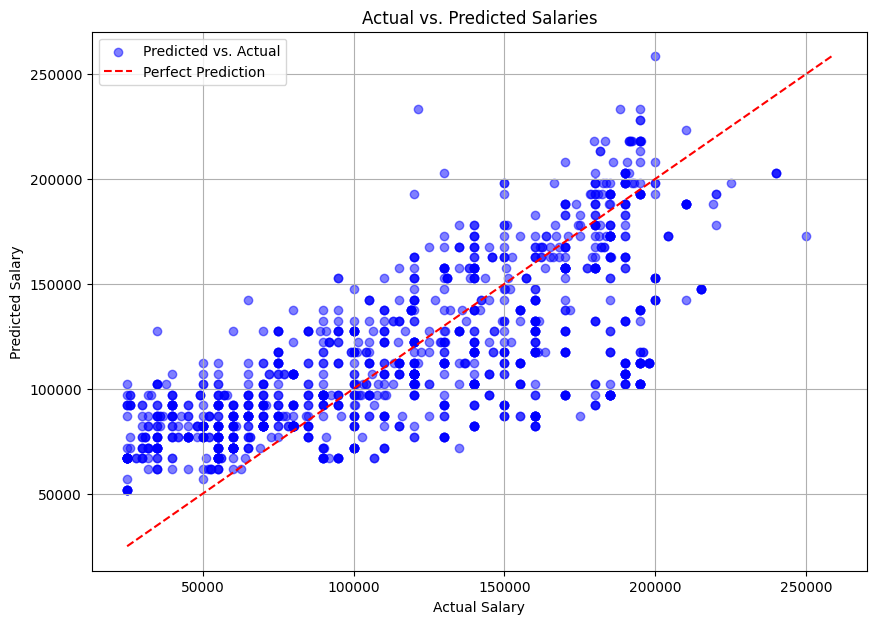

In [27]:
import numpy as np

plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.legend()
plt.grid(True)
plt.show()

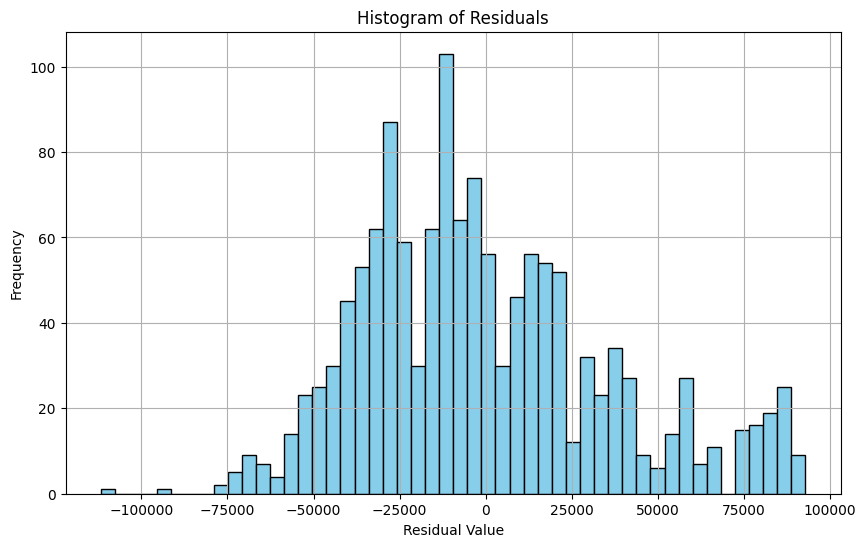

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

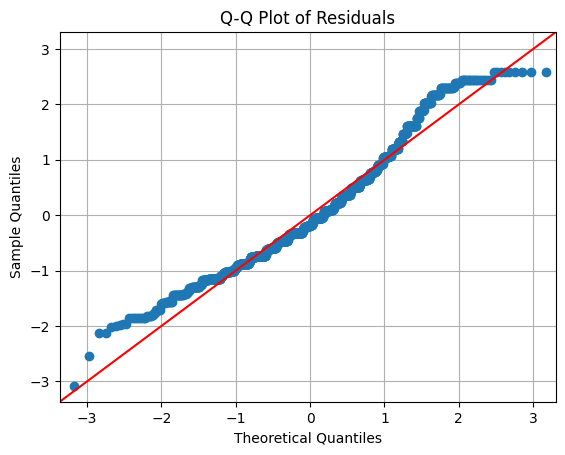

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)

plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

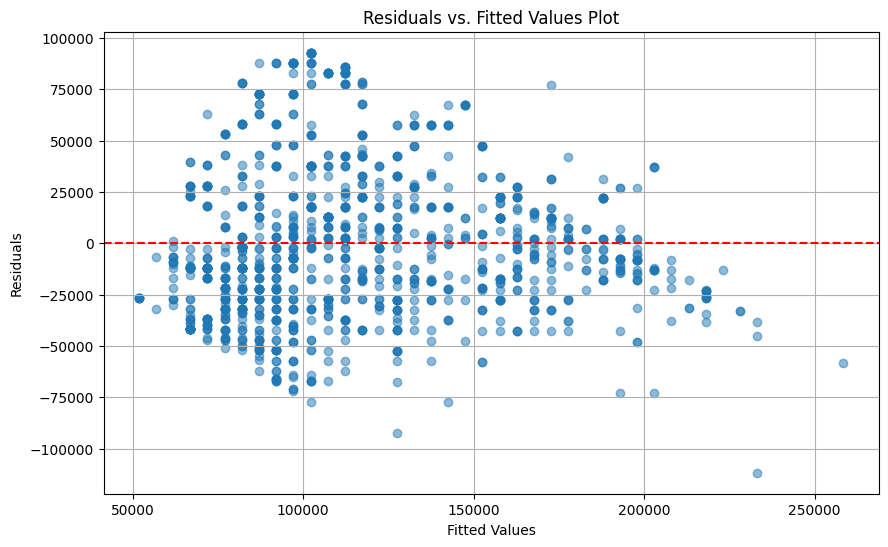

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)

plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')

plt.grid(True)
plt.show()

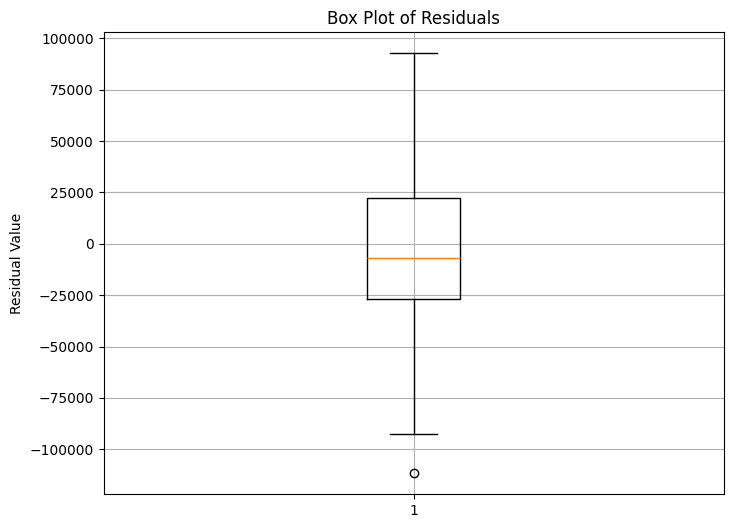

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(residuals)

plt.title('Box Plot of Residuals')
plt.ylabel('Residual Value')

plt.grid(True)
plt.show()

In [33]:
categorical_features = ['Gender', 'Education Level', 'Job Title']

X_categorical = pd.get_dummies(df[categorical_features], drop_first=True)

X_new = pd.concat([df[['Age']], X_categorical], axis=1)
y = df['Salary']

print("Shape of new feature set X_new:", X_new.shape)
print("Shape of target variable y:", y.shape)
print("\nFirst 5 rows of X_new:\n", X_new.head())
print("\nFirst 5 rows of y:\n", y.head())

Shape of new feature set X_new: (6699, 200)
Shape of target variable y: (6699,)

First 5 rows of X_new:
     Age  Gender_Male  Gender_Other  Education Level_Bachelor's Degree  \
0  32.0         True         False                              False   
1  28.0        False         False                              False   
2  45.0         True         False                              False   
3  36.0        False         False                              False   
4  52.0         True         False                              False   

   Education Level_High School  Education Level_Master's  \
0                        False                     False   
1                        False                      True   
2                        False                     False   
3                        False                     False   
4                        False                      True   

   Education Level_Master's Degree  Education Level_PhD  Education Level_phD  \
0              

In [34]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_new: (5359, 200)
Shape of X_test_new: (1340, 200)
Shape of y_train: (5359,)
Shape of y_test: (1340,)


In [35]:
from sklearn.linear_model import LinearRegression

model_new = LinearRegression()
model_new.fit(X_train_new, y_train)

print("New Linear Regression model trained successfully.")
print("Model coefficients (new): ", model_new.coef_)
print("Model intercept (new): ", model_new.intercept_)

New Linear Regression model trained successfully.
Model coefficients (new):  [ 3.96912909e+03  2.25422283e+02 -1.17886661e+04 -5.52219067e+04
 -6.55469832e+04 -6.72122356e+03 -4.64694888e+04 -4.25873027e+04
  6.91190345e+03 -1.01863407e-09 -4.66047877e+04  8.47433523e+04
  1.96292912e+01  1.37829654e+04 -2.91038305e-11  1.03555676e+05
  1.39957754e+05  1.38204721e+05  7.11834050e+04  2.02271622e-09
  1.22553550e+04 -1.88147745e+04 -1.94995664e-09  3.15086543e+04
 -1.91234836e+04 -1.09598032e+04  7.47568156e+04 -1.19906741e+04
  1.11165630e+05  5.03000159e+04  4.48456454e+04 -1.68363195e+04
  7.00595041e+04  5.44540447e+04  5.23386418e+04  4.21842872e+04
  1.23426732e+05  6.01225454e+04  4.13433048e+04  6.07507492e+04
  6.69388101e-10  7.73992723e+04  8.52616047e+04  4.54310832e+04
  4.32151582e+04  8.73114914e-10  7.63684014e+04 -3.61665295e+04
  1.90083877e+04  7.49420112e+04  1.07758491e+05  7.09105981e+04
  7.54944196e+04  9.32199195e+04  4.80695490e+04 -2.66047877e+04
 -1.24041268e

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred_new = model_new.predict(X_test_new)

r2_new = r2_score(y_test, y_pred_new)
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)

print(f"New Model R-squared: {r2_new:.2f}")
print(f"New Model Mean Absolute Error (MAE): {mae_new:.2f}")
print(f"New Model Mean Squared Error (MSE): {mse_new:.2f}")

New Model R-squared: 0.86
New Model Mean Absolute Error (MAE): 14075.46
New Model Mean Squared Error (MSE): 396646386.14


In [37]:
feature_importances = pd.Series(model_new.coef_, index=X_new.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

print("Top 10 Feature Importances (Coefficients):")
print(sorted_importances.head(10))

print("\nBottom 10 Feature Importances (Coefficients):")
print(sorted_importances.tail(10))

Top 10 Feature Importances (Coefficients):
Job Title_Chief Data Officer          139957.753643
Job Title_Chief Technology Officer    138204.720941
Job Title_Marketing Director          136053.929037
Job Title_Director of Data Science    123426.731799
Job Title_Research Director           122550.006127
Job Title_Research Scientist          121489.099574
Job Title_Data Scientist              111165.630143
Job Title_Financial Manager           107758.490656
Job Title_Social Media Man            104262.103498
Job Title_Senior Data Scientist       103596.498197
dtype: float64

Bottom 10 Feature Importances (Coefficients):
Job Title_Recruiter                            -32558.481332
Job Title_Event Coordinator                    -36166.529524
Job Title_Training Specialist                  -37558.481332
Job Title_Office Manager                       -41527.610419
Education Level_PhD                            -42587.302696
Education Level_Master's Degree                -46469.488815
Job Title

In [44]:
residuals_new = y_test - y_pred_new

print("Residuals:\n", residuals_new.head())

Residuals:
 2460    13511.458045
2230    12148.281129
5559    -2731.067714
3080    -8586.412867
265    -59305.598380
Name: Salary, dtype: float64


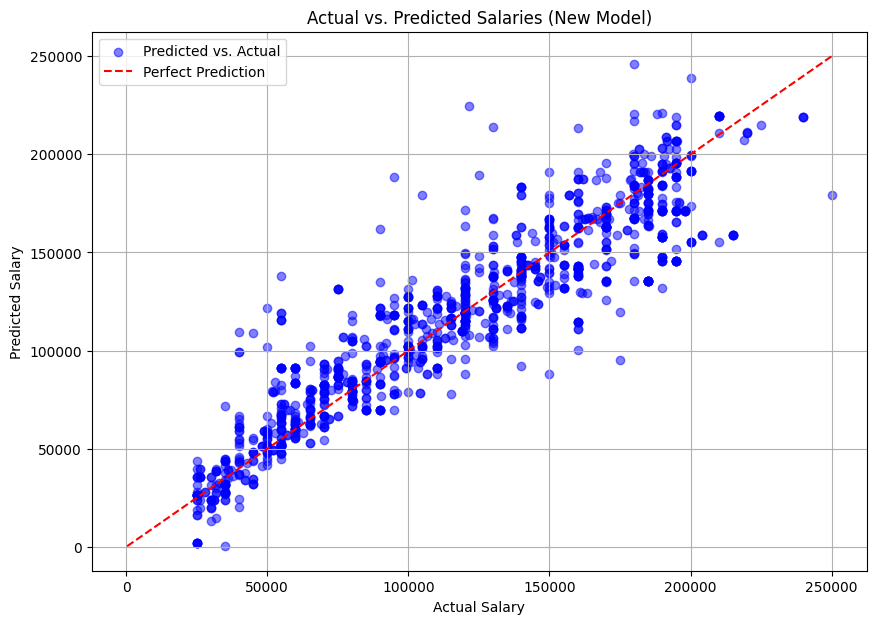

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_new, color='blue', alpha=0.5, label='Predicted vs. Actual')

min_val_new = min(y_test.min(), y_pred_new.min())
max_val_new = max(y_test.max(), y_pred_new.max())
plt.plot([min_val_new, max_val_new], [min_val_new, max_val_new], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries (New Model)')
plt.legend()
plt.grid(True)
plt.show()

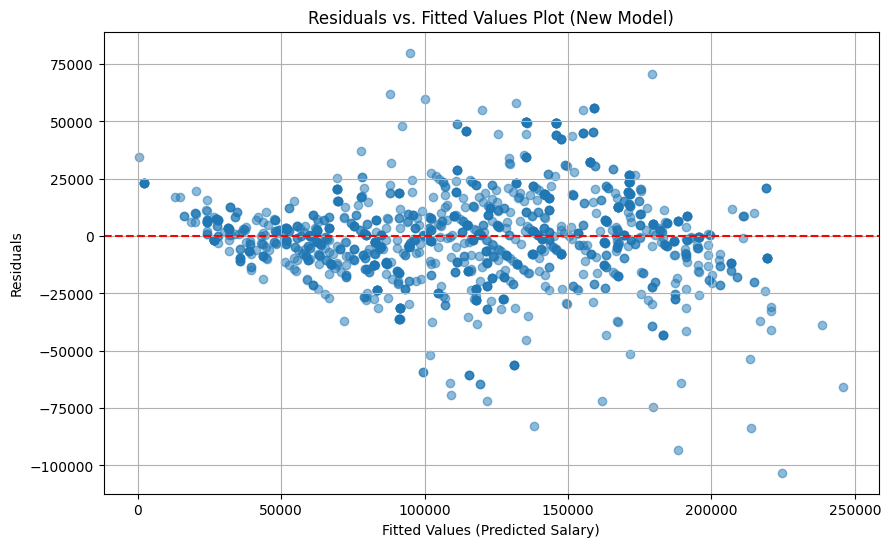

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_new, residuals_new, alpha=0.5)

plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Fitted Values (Predicted Salary)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot (New Model)')

plt.grid(True)
plt.show()

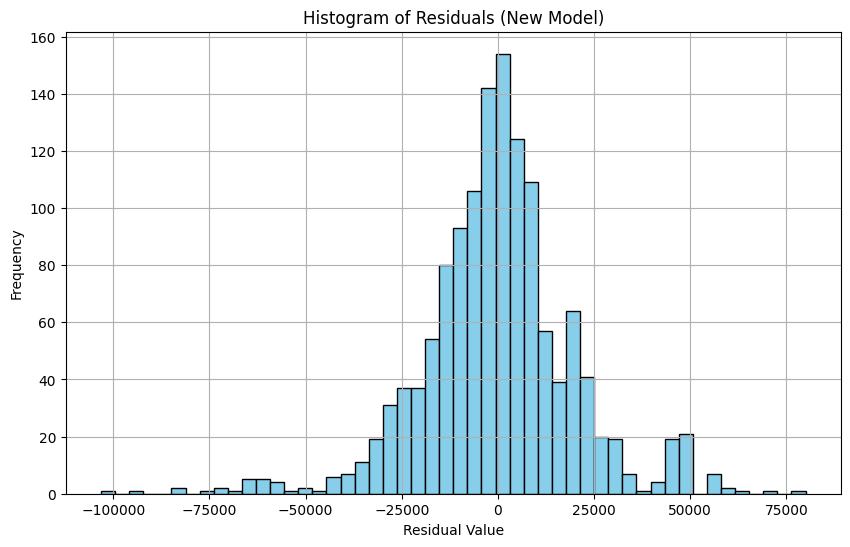

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(residuals_new, bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Residuals (New Model)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

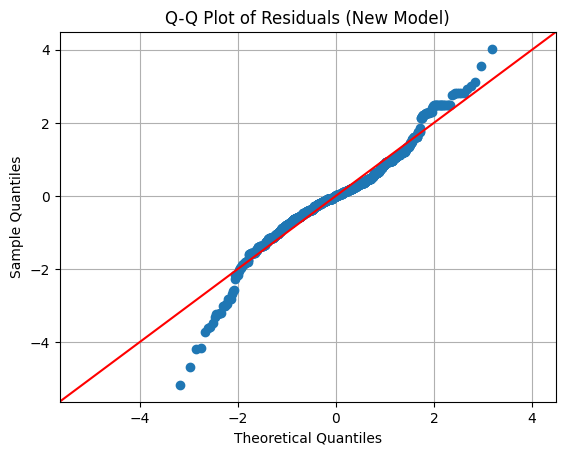

In [42]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_new, line='45', fit=True)

plt.title('Q-Q Plot of Residuals (New Model)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

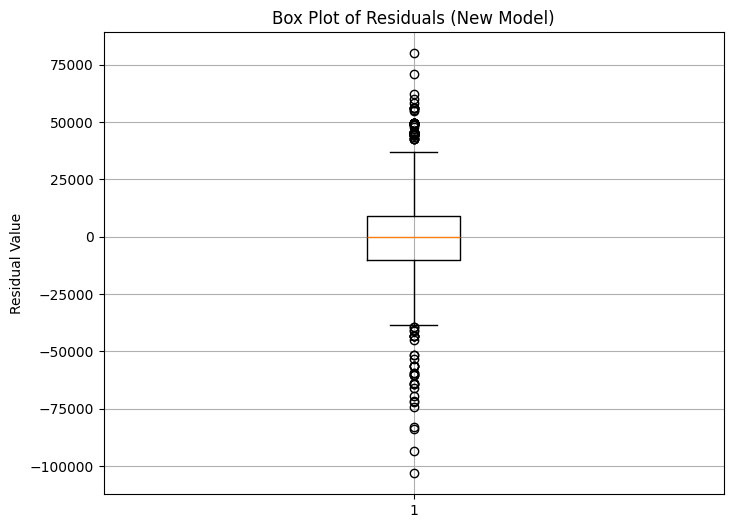

In [43]:
plt.figure(figsize=(8, 6))
plt.boxplot(residuals_new)

plt.title('Box Plot of Residuals (New Model)')
plt.ylabel('Residual Value')

plt.grid(True)
plt.show()

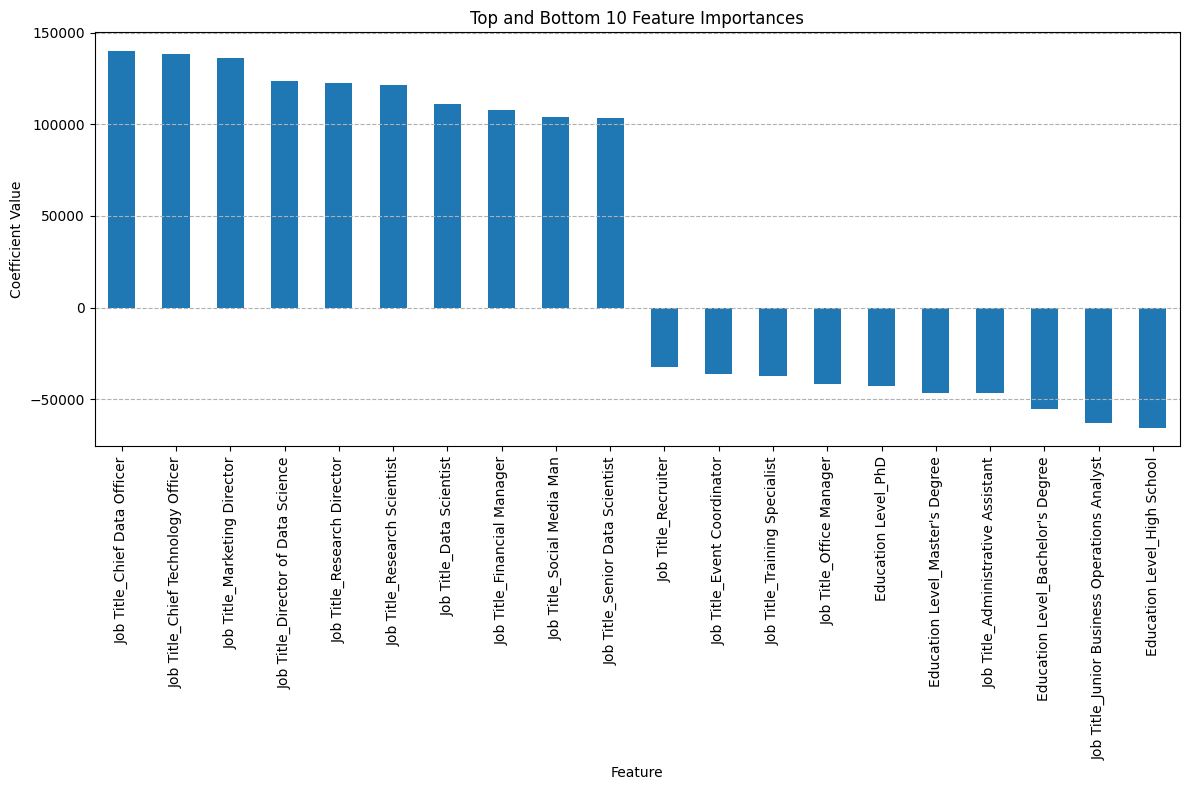

In [45]:
top_10_features = sorted_importances.head(10)
bottom_10_features = sorted_importances.tail(10)

selected_features = pd.concat([top_10_features, bottom_10_features])

plt.figure(figsize=(12, 8))
selected_features.plot(kind='bar')
plt.title('Top and Bottom 10 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Correlation Matrix (first 5x5 elements):


,Age,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,Education Level_phD,Job Title_Accountant,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
Age,1.000000,0.114892,0.035753,-0.306717,-0.237900,0.007621,0.129663,0.501786,-0.010625,-0.004207,...,0.015047,0.003816,-0.009021,-0.010625,0.008629,0.000606,-0.010625,0.021466,0.021466,-0.046595
Gender_Male,0.114892,1.000000,-0.050403,0.069402,-0.072724,-0.101833,-0.113724,0.090881,0.011094,-0.013458,...,0.011094,0.011094,0.011094,0.011094,-0.013458,-0.013458,-0.013458,0.011094,0.011094,0.000826
Gender_Other,0.035753,-0.050403,1.000000,-0.032708,0.144772,-0.009699,-0.009914,-0.023182,-0.000559,-0.000559,...,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.000559,-0.005249
Education Level_Bachelor's Degree,-0.306717,0.069402,-0.032708,1.000000,-0.191338,-0.151485,-0.395759,-0.362055,-0.008733,-0.008733,...,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,-0.008733,0.054584
Education Level_High School,-0.237900,-0.072724,0.144772,-0.191338,1.000000,-0.056741,-0.148238,-0.135614,-0.003271,-0.003271,...,-0.003271,-0.003271,-0.003271,-0.003271,-0.003271,-0.003271,-0.003271,-0.003271,-0.003271,-0.014874


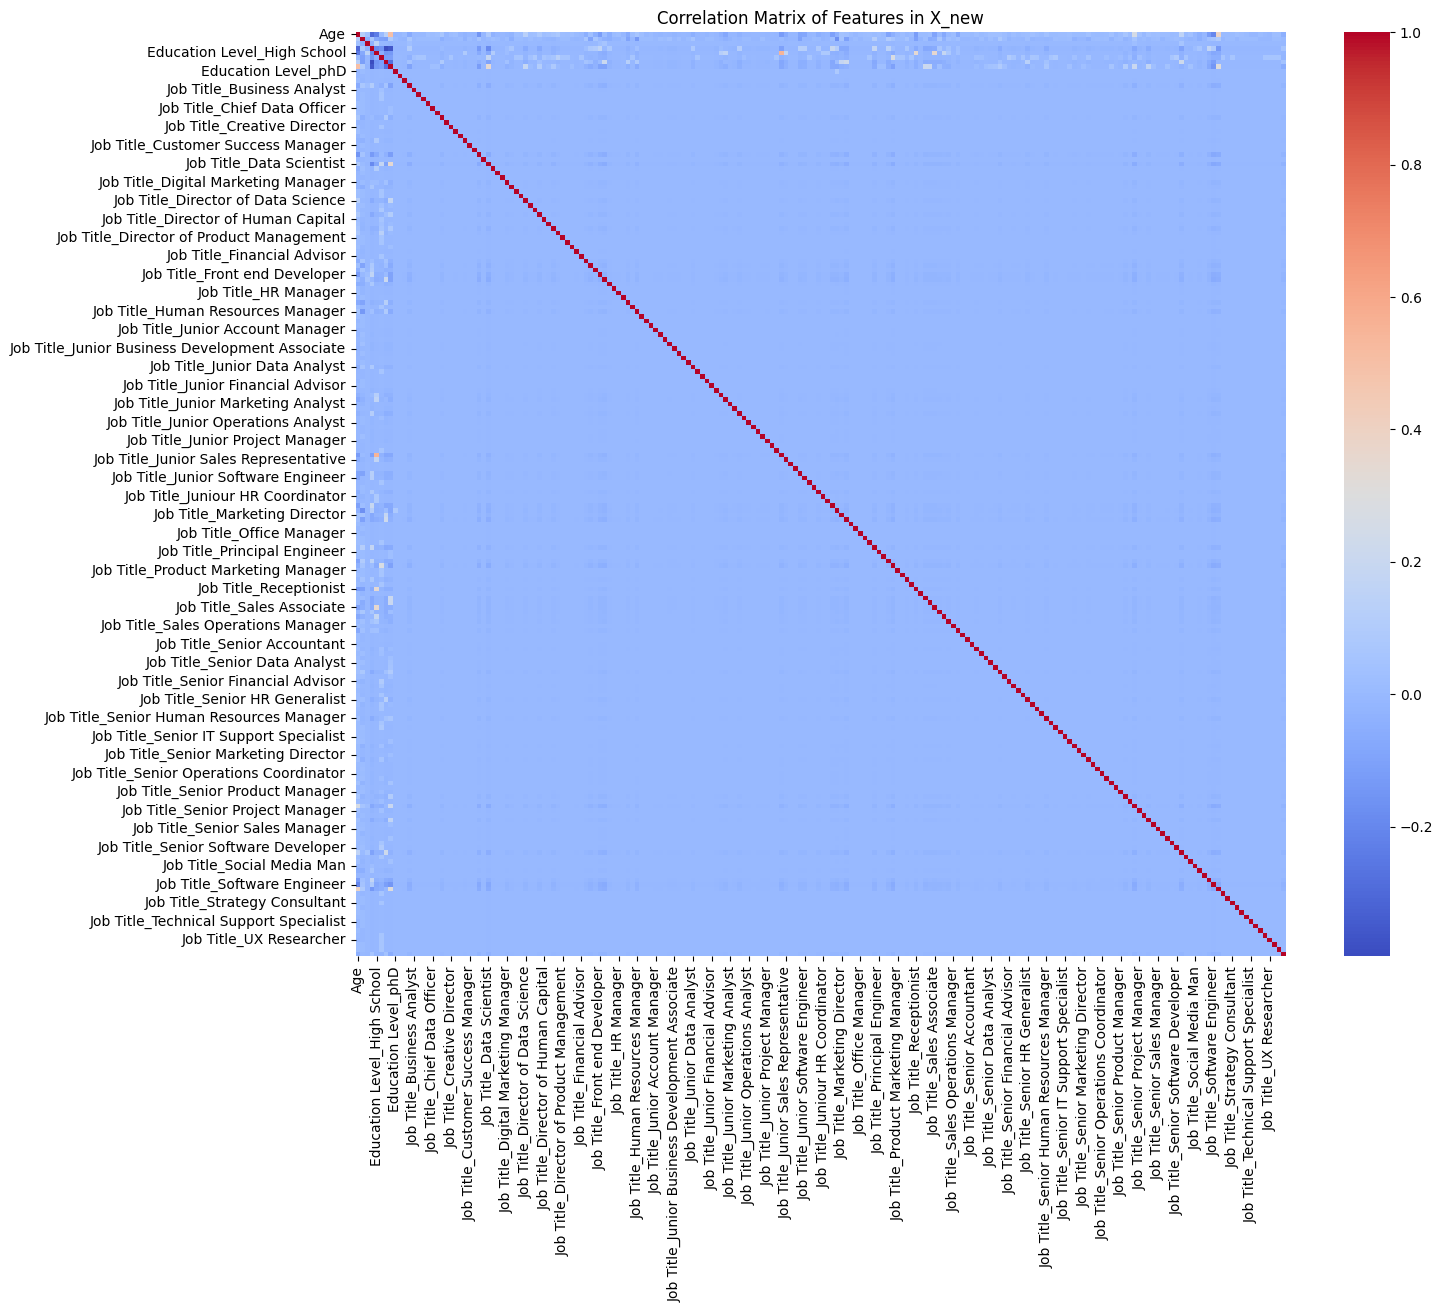

In [46]:
correlation_matrix = X_new.corr()

print("Correlation Matrix (first 5x5 elements):")
display(correlation_matrix.head())

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features in X_new')
plt.show()